***Using FFT for Denoising Sound Signals***

In this tutorial, we will explore how to use the Fast Fourier Transform (FFT) to denoise sound signals. FFT is a powerful tool that converts a signal from its original time domain into the frequency domain. By analyzing the frequency components of a signal, we can identify and remove unwanted noise, thereby enhancing the quality of the original sound.

*Steps Involved*:

**Load the Sound Signal**:
We will start by loading a noisy sound signal using the numpy.

**Apply FFT**:
Using FFT, we transform the time-domain signal into the frequency domain. This allows us to see the different frequency components that make up the signal.

**Identify and Filter Noise**:
In the frequency domain, noise often appears as high-frequency components or spikes that are not part of the original signal. By identifying and filtering out these unwanted frequencies, we can reduce the noise.

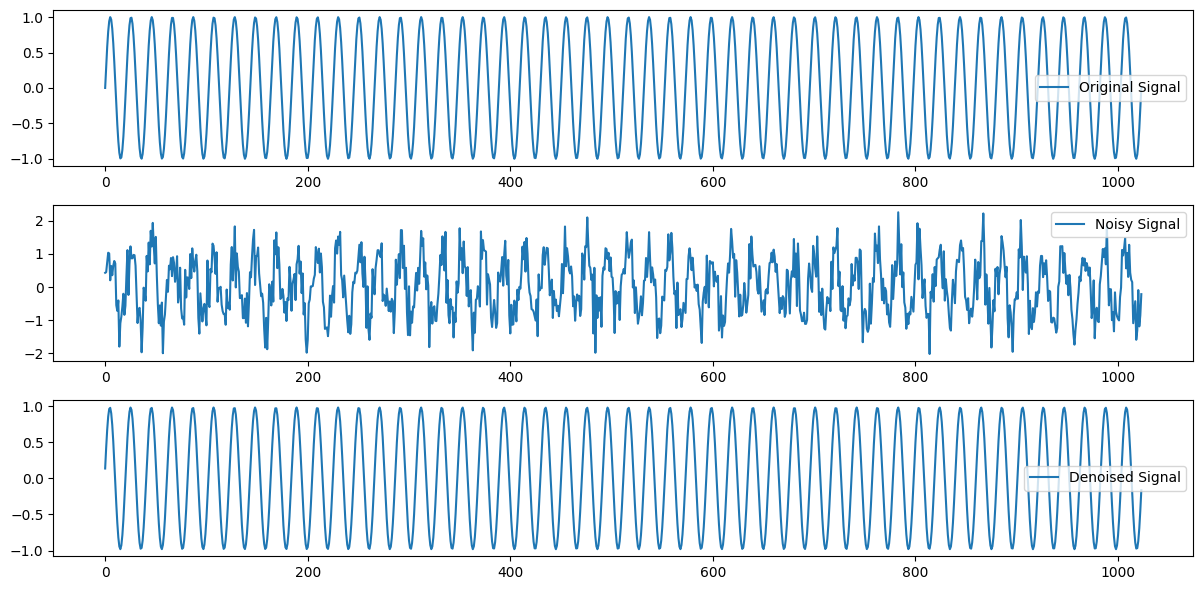

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(length, freq):
  """Generates a sinusoidal signal.

  Args:
    length: Length of the signal.
    freq: Frequency of the signal.

  Returns:
    A numpy array representing the signal.
  """

  t = np.linspace(0, 1, length)
  signal = np.sin(2 * np.pi * freq * t)
  return signal

def add_noise(signal, noise_level):
  """Adds noise to a signal.

  Args:
    signal: The original signal.
    noise_level: The level of noise to add.

  Returns:
    A numpy array representing the noisy signal.
  """

  noise = np.random.normal(0, noise_level, len(signal))
  noisy_signal = signal + noise
  return noisy_signal

def denoise_fft(noisy_signal, threshold):
  """Denoises a signal using FFT.

  Args:
    noisy_signal: The noisy signal.
    threshold: The threshold for filtering frequency components.

  Returns:
    A numpy array representing the denoised signal.
  """

  fft_signal = np.fft.fft(noisy_signal)
  fft_signal[np.abs(fft_signal) < threshold] = 0
  denoised_signal = np.real(np.fft.ifft(fft_signal))
  return denoised_signal

if __name__ == "__main__":
  # Generate a signal
  signal_length = 1024
  signal_freq = 50
  signal = generate_signal(signal_length, signal_freq)

  # Add noise
  noise_level = 0.5
  noisy_signal = add_noise(signal, noise_level)

  # Denoise using FFT
  threshold = 100
  denoised_signal = denoise_fft(noisy_signal, threshold)

  # Plot the results
  plt.figure(figsize=(12, 6))
  plt.subplot(311)
  plt.plot(signal, label='Original Signal')
  plt.legend()
  plt.subplot(312)
  plt.plot(noisy_signal, label='Noisy Signal')
  plt.legend()
  plt.subplot(313)
  plt.plot(denoised_signal, label='Denoised Signal')
  plt.legend()
  plt.tight_layout()
  plt.show()
